## About this file

#### Attribute Information: (classes: edible=e, poisonous=p)
##### SOURCE: https://www.kaggle.com/uciml/mushroom-classification

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

## AIM:- TO FIND THE 'CLASS' OF MUSHROOM.

In [20]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [21]:
path = 'C:/Users/me/Desktop/pyt/kaggle/mushroom/mushrooms.csv'

In [22]:
data= pd.read_csv(path)

## EXPLORING THE DATA

In [23]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

Since every element is an object, so, we've to encode it first.

In [25]:
data.shape

(8124, 23)

### Getting all the unique values in the data.

In [26]:
unique_data= [] 
for x in data.columns.tolist():
    num= data[x].nunique()
    value= data[x].unique()
    unique_data.append(pd.Series({'col_name' : x,
               'num_unique' : num,
               'value_unique': value}))
uniques = pd.concat(unique_data,axis=1).T.set_index('col_name')
uniques

,num_unique,value_unique
col_name,,
class,2,"[p, e]"
cap-shape,6,"[x, b, s, f, k, c]"
cap-surface,4,"[s, y, f, g]"
cap-color,10,"[n, y, w, g, e, p, b, u, c, r]"
bruises,2,"[t, f]"
odor,9,"[p, a, l, n, f, c, y, s, m]"
gill-attachment,2,"[f, a]"
gill-spacing,2,"[c, w]"
gill-size,2,"[n, b]"


## Getting all the missing values in the data.

In [8]:
def missing_values(data):
    null_count = data.isnull().sum()
    empty_count = ((data == '') | (data== ' ')).sum()
    nan_count = ((data == 'nan') | (data== 'NaN')).sum()
    null_percent = null_count/ data.shape[0]
    nan_percent = nan_count/ data.shape[0]
    empty_percent = empty_count/ data.shape[0]
    value= pd.DataFrame({'null_count': null_count ,
                         'null_percent' : null_percent,
                         'nan_count': nan_count,
                         'nan_percent' : nan_percent,
                         'empty_count': empty_count,
                         'empty_percent' : empty_percent
                        })
    return value
missing_values(data)

,null_count,null_percent,nan_count,nan_percent,empty_count,empty_percent
class,0,0.0,0,0.0,0,0.0
cap-shape,0,0.0,0,0.0,0,0.0
cap-surface,0,0.0,0,0.0,0,0.0
cap-color,0,0.0,0,0.0,0,0.0
bruises,0,0.0,0,0.0,0,0.0
odor,0,0.0,0,0.0,0,0.0
gill-attachment,0,0.0,0,0.0,0,0.0
gill-spacing,0,0.0,0,0.0,0,0.0
gill-size,0,0.0,0,0.0,0,0.0
gill-color,0,0.0,0,0.0,0,0.0


There are 23 columns and 8124 rows, out of which none are empty/ nan/ null.

In [9]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
print('THESE ARE THE CLASSES: ')
print('\n')
for x in data.columns.tolist():
    data[x]=le.fit_transform(data[x])
    print(x,le.classes_)

THESE ARE THE CLASSES: 


class ['e' 'p']
cap-shape ['b' 'c' 'f' 'k' 's' 'x']
cap-surface ['f' 'g' 's' 'y']
cap-color ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises ['f' 't']
odor ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment ['a' 'f']
gill-spacing ['c' 'w']
gill-size ['b' 'n']
gill-color ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape ['e' 't']
stalk-root ['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring ['f' 'k' 's' 'y']
stalk-surface-below-ring ['f' 'k' 's' 'y']
stalk-color-above-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type ['p']
veil-color ['n' 'o' 'w' 'y']
ring-number ['n' 'o' 't']
ring-type ['e' 'f' 'l' 'n' 'p']
spore-print-color ['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population ['a' 'c' 'n' 's' 'v' 'y']
habitat ['d' 'g' 'l' 'm' 'p' 'u' 'w']


#### Data after using LABEL ENCODER.

In [10]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


#### Finding the correlation(absolute value)

In [11]:
cor= data.corr().abs()
cor

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,0.031384,0.501530,0.093552,0.129200,0.348387,0.540024,0.530566,...,0.298801,0.154003,0.146730,NaN,0.145142,0.214366,0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,0.050454,0.048203,0.035374,0.021935,0.078865,0.013196,0.054050,0.006039,...,0.032591,0.031659,0.030390,NaN,0.072560,0.106534,0.025457,0.073416,0.063413,0.042221
cap-surface,0.178446,0.050454,1.000000,0.019402,0.070228,0.045233,0.034180,0.282306,0.208100,0.161017,...,0.107965,0.066050,0.068885,NaN,0.016603,0.026147,0.106407,0.230364,0.021555,0.163887
cap-color,0.031384,0.048203,0.019402,1.000000,0.000764,0.387121,0.041436,0.144259,0.169464,0.084659,...,0.047710,0.002364,0.008057,NaN,0.036130,0.005822,0.162513,0.293523,0.144770,0.033925
bruises,0.501530,0.035374,0.070228,0.000764,1.000000,0.061825,0.137359,0.299473,0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,0.285008,0.088137,0.075095
odor,0.093552,0.021935,0.045233,0.387121,0.061825,1.000000,0.059590,0.063936,0.310495,0.129213,...,0.061820,0.174532,0.169407,NaN,0.057747,0.111905,0.281387,0.469055,0.043623,0.026610
gill-attachment,0.129200,0.078865,0.034180,0.041436,0.137359,0.059590,1.000000,0.071489,0.108984,0.128567,...,0.116177,0.099299,0.097160,NaN,0.897518,0.093236,0.146689,0.029524,0.165575,0.030304
gill-spacing,0.348387,0.013196,0.282306,0.144259,0.299473,0.063936,0.071489,1.000000,0.108333,0.100193,...,0.213775,0.274574,0.253505,NaN,0.073363,0.243014,0.195897,0.047323,0.529253,0.154680
gill-size,0.540024,0.054050,0.208100,0.169464,0.369596,0.310495,0.108984,0.108333,1.000000,0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,0.171362,0.460872,0.622991,0.147682,0.161418
gill-color,0.530566,0.006039,0.161017,0.084659,0.527120,0.129213,0.128567,0.100193,0.516736,1.000000,...,0.257224,0.058299,0.074781,NaN,0.097583,0.096054,0.629398,0.416135,0.034090,0.202972


#### Plotting the correlation

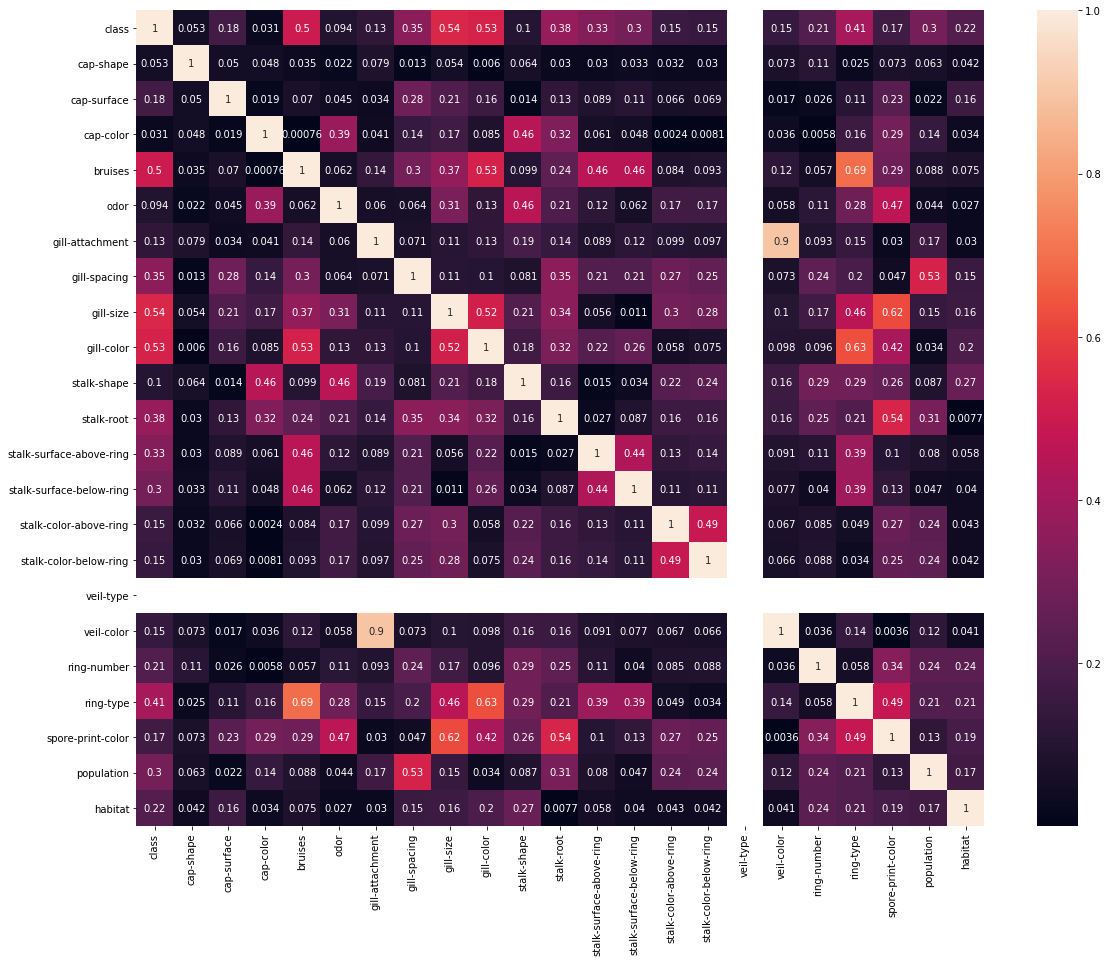

In [12]:
plt.figure(figsize=(19,15))
ax= sns.heatmap(cor, annot= True)

C:\Users\me\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


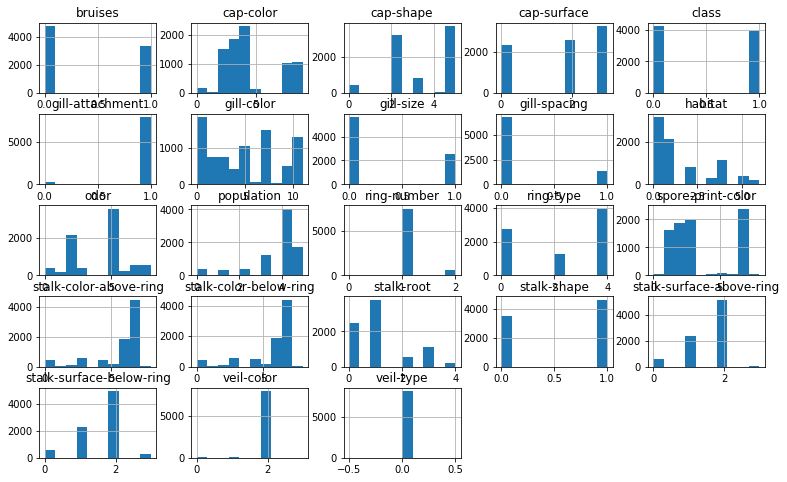

In [13]:
fig= plt.figure(figsize=(13,8))
ax= fig.gca()
data.hist(ax=ax)
plt.show()

### SPLITTING THE DATA 

In [14]:
x_dropped_columns = data.drop(['cap-shape','cap-color','veil-type','habitat','class'],axis=1)  #removing some features

x_all_columns = data.drop('class', axis=1)   #taking all the features

y= data['class']

In [15]:
from sklearn.model_selection import train_test_split

x_train_drop,x_test_drop,y_train_drop,y_test_drop = train_test_split(x_dropped_columns,y, test_size= 0.3, random_state=0)

x_train_all,x_test_all,y_train_all,y_test_all = train_test_split(x_all_columns, y, test_size= 0.3, random_state=0)

### Using two different Random Forest objects for two different 'x' .

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
result= []
RF_1 = RandomForestClassifier(oob_score=False, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)
RF_2 = RandomForestClassifier(oob_score=False, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)
# Iterate through all of the possibilities for number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    x1= RF_1.set_params(n_estimators=n_trees)     # Use this to set the number of trees
    x2= RF_2.set_params(n_estimators=n_trees)
    
    RF_1.fit(x_train_drop, y_train_drop)            # Fit the model
    RF_2.fit(x_train_all, y_train_all) 
    
    rf1_ypred = RF_1.predict(x_test_drop)
    rf2_ypred = RF_2.predict(x_test_all)
    
    result.append(pd.Series({'num_trees' : n_trees,
                            'pred_score_1' : accuracy_score(y_test_drop,rf1_ypred),
                            'pred_score_2' : accuracy_score(y_test_all,rf2_ypred)
                            }))

rf_result = pd.concat(result, axis=1).T.set_index('num_trees')  
rf_result

,pred_score_1,pred_score_2
num_trees,,
15.0,1.0,1.0
20.0,1.0,1.0
30.0,1.0,1.0
40.0,1.0,1.0
50.0,1.0,1.0
100.0,1.0,1.0
150.0,1.0,1.0
200.0,1.0,1.0
300.0,1.0,1.0


Surprisingly, it works with every number of trees we choose!

(If something is wrong, please let me know!)


### Plotting HEATMAP for the Confusion matrix

[Text(0.5,1,'confusion_matrix_2')]

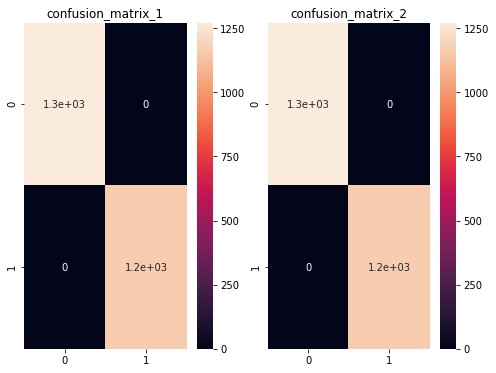

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix_1 = confusion_matrix(y_test_drop, rf1_ypred)
confusion_matrix_2 = confusion_matrix(y_test_all, rf2_ypred)

fig,ax_=plt.subplots(1,2,figsize=(8,6))
sns.heatmap(confusion_matrix_1, annot= True, ax=ax_[0])
sns.heatmap(confusion_matrix_2, annot= True, ax=ax_[1])
ax_[0].set(title='confusion_matrix_1')
ax_[1].set(title='confusion_matrix_2')

From the heatmap we can notice that no data was predicted wrong!

Thus, Random Forest predicts with 100% accuracy!

## Using two different Decision Tree objects for two different 'x' .

In [18]:
results=[]
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(random_state=42)
dt2 = DecisionTreeClassifier(random_state=42)

dt1.fit(x_train_drop, y_train_drop)
dt2.fit(x_train_all, y_train_all)

dt1_pred= dt1.predict(x_test_drop)
dt2_pred= dt2.predict(x_test_all)

results.append(pd.Series({'pred_score_1' : accuracy_score(y_test_drop,dt1_pred),
                          'pred_score_2' : accuracy_score(y_test_all,dt2_pred)
                        }))

dt_result = pd.concat(results, axis=1).T 
dt_result

,pred_score_1,pred_score_2
0,1.0,1.0


Decision tree also performs perfectly!

### CONCLUSION

For some reason the models are predicting perfectly.

Both DECISON TREE and RANDOM FOREST are giving outcomes with 100% accuracy, which is great!